# *Credit Card *

## Abstract & Summary

This project's goal is to help K bank with their promotion plan and goes step by step from Data Cleaning, Exploratory Data Analysis (Visualization & Correlation), Modeling & Evaluation, and conclusion. In data cleaning, I try to find missing values and outliers, in EDA I have included basic information about the dataset being used along with several visualizations for better understanding. In modeling and evaluation, KMeans and PCA are used to cluster the customers into 4 different groups, and each groups' spending behavior is explained to find the best promotion plan for K bank. 

### Business Problem and Corresponding Machine Learning Problem: 

K bank in DC is trying to create a new credit card for their bank. The new credit card is geared to sell to new and existing customers, but the bank wants to make more benefits for existing customers. In order to find out the best benefit program for their new credit card, the bank has hired me to categorize the customers by clustering them. K bank provided me with a dataset that contains data on how the customer uses their bank account. By using Kmeans method, I will attempt to figure out how to cluster the customers along with finding the average of each features for better understanding of the groups. 

### Data Dictionary
The dataset was retrieved from: https://www.kaggle.com/arjunbhasin2013/ccdata. It was collected to see the usage behavior of 8950 active credit card holders over a 6 month period of time in 2017 for marketing strategy. It contains 18 different features, which are explained below. 

1) CUSTID : Identification of Credit Card holder (Categorical)

2) BALANCE : Balance amount left in their account to make purchases

3) BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently 
updated)

4) PURCHASES : Amount of purchases made from account

5) ONEOFFPURCHASES : Maximum purchase amount done in one-go

6) INSTALLMENTSPURCHASES : Amount of purchase done in installment

7) CASHADVANCE : Cash in advance given by the user

8) PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not 
frequently purchased)

9) ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently 
purchased)

10) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11) CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

12) CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

13) PURCHASESTRX : Number of purchase transactions made

14) CREDITLIMIT : Limit of Credit Card for user

15) PAYMENTS : Amount of Payment done by user

16) MINIMUM_PAYMENTS : Minimum amount of payments made by user

17) PRCFULLPAYMENT : Percent of full payment paid by user

18) TENURE : Tenure of credit card service for user




### 1. Importing Packages 


In [385]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

### 2. Reading CSV file from Dataset to Dataframe

In order to use the data cvs found, we will have to read it in pandas to use it for our work. Below shows our dataframe.
Below shows the number of columns/observations (8950), feature names and number of rows (18).

In [336]:
df = pd.read_csv('Creditcard.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [337]:
print(df.shape)

(8950, 18)


### 3. Data Cleaning

#### 3.1 Checking null values
As a first step of data cleaning, we will see if our data has any missing value. False means there are no missing data, and true means that there are missing data. It seems like we have missing data for credit limit and minimum payments. 

In [338]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

#### 3.2 Filling in null values 
We will fill in the null values for 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTDS' with the mean for better calculation.

In [339]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

#### 3.2 Checking outliers

We are going to see if there are any outliers in our data. 

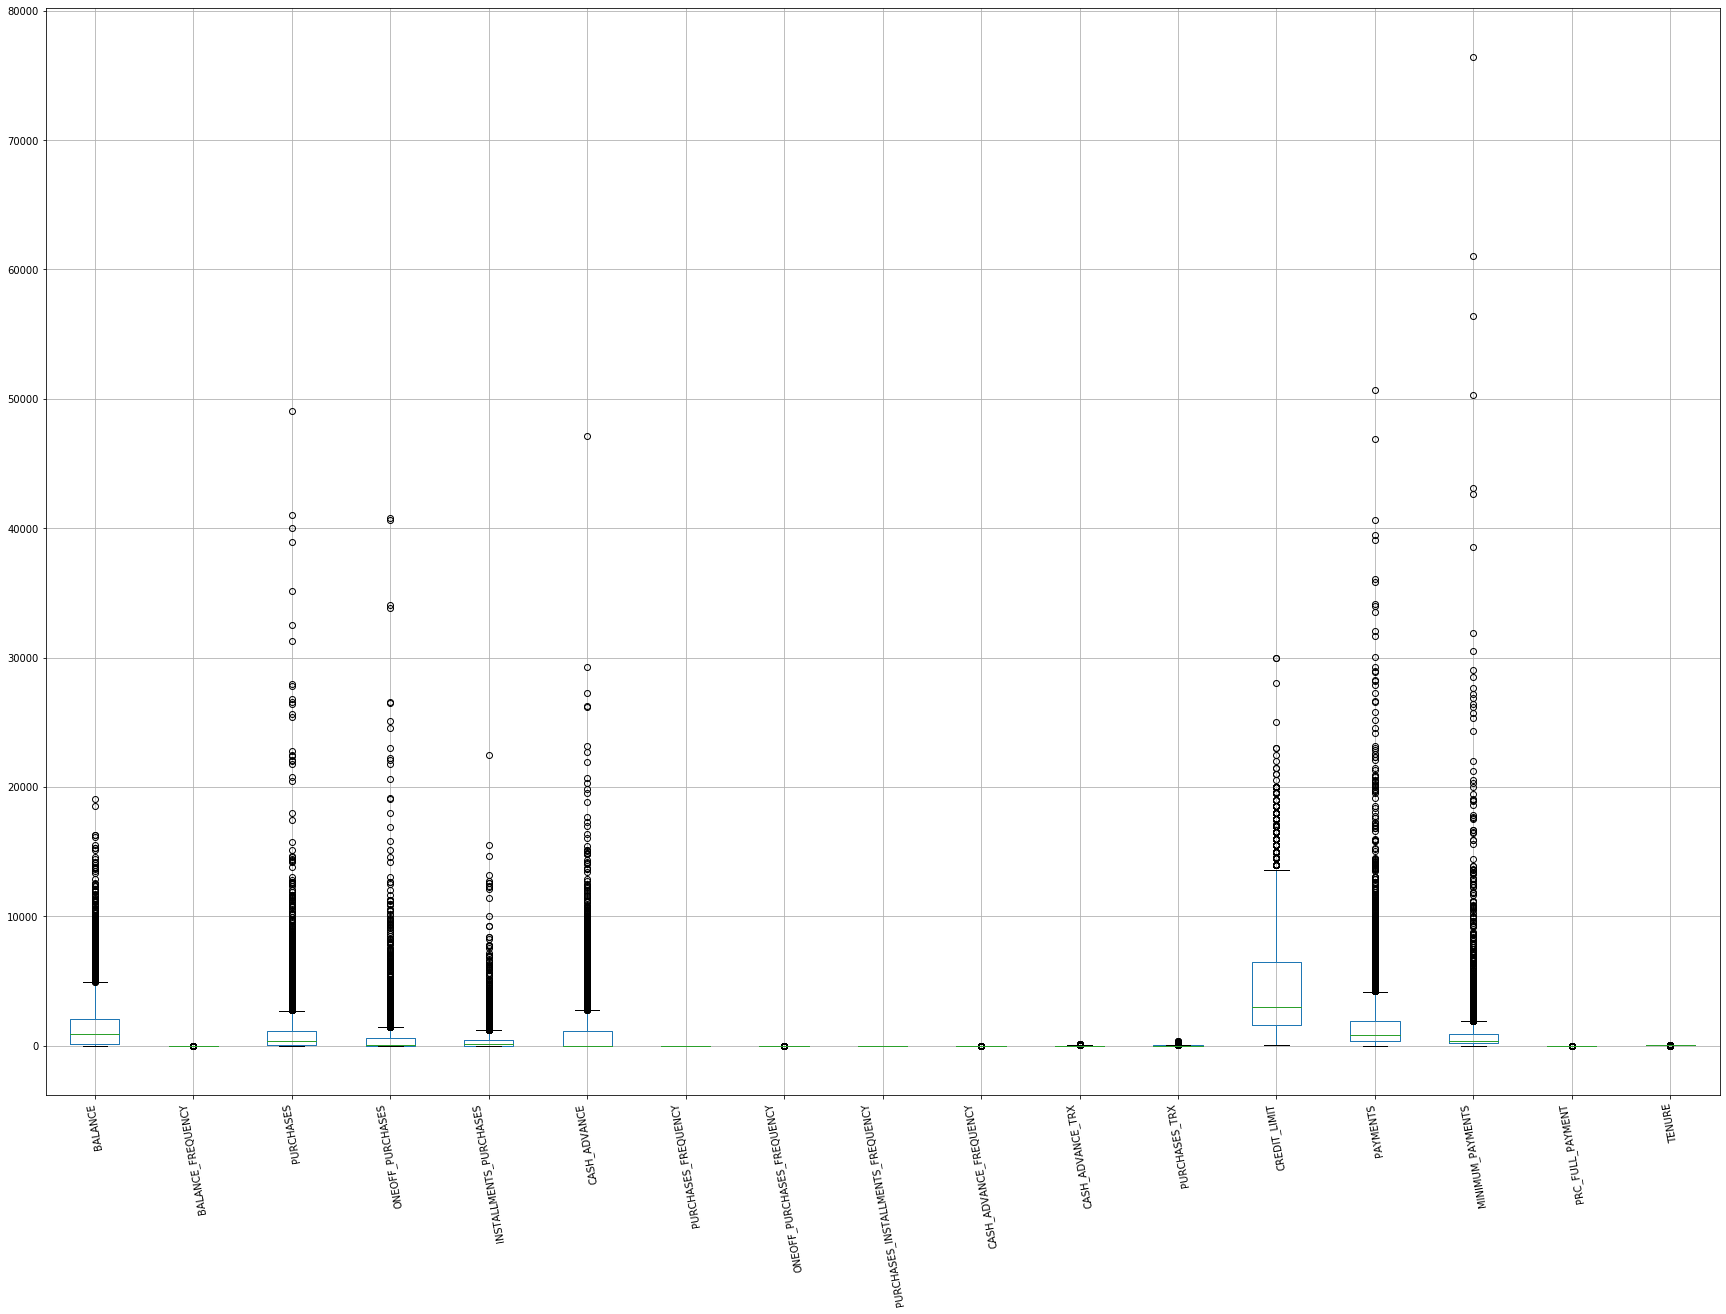

In [340]:
df.boxplot(rot=100, figsize=(30,20))

The dots represent outliers. Removing all the outliers will result in less accurate result, so we will not remove them. 

#### 3.3 Features
We will be dropping cust_id as it is not important to use in our data set. It only shows the customer id, which is already labeled by number of rows so having cust_id would be repetitive. 

In [341]:
df.drop('CUST_ID',axis=1,inplace=True)

In [342]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### 3.4 Scaling data 

In [343]:
scale = StandardScaler()
scaled_df = scale.fit_transform(df)
scaled_df.shape

(8950, 17)

### 4. Exploratory Data Analysis (Visualization & Correlation)

#### 4.1 Dataset information

Here is some basic information about our data with the count of columns, mean, std, minimum, 25%, 50%, 75%, and max. 

In [344]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### 4.2 Distribution Plot

Below shows the distribution chart for each features. 

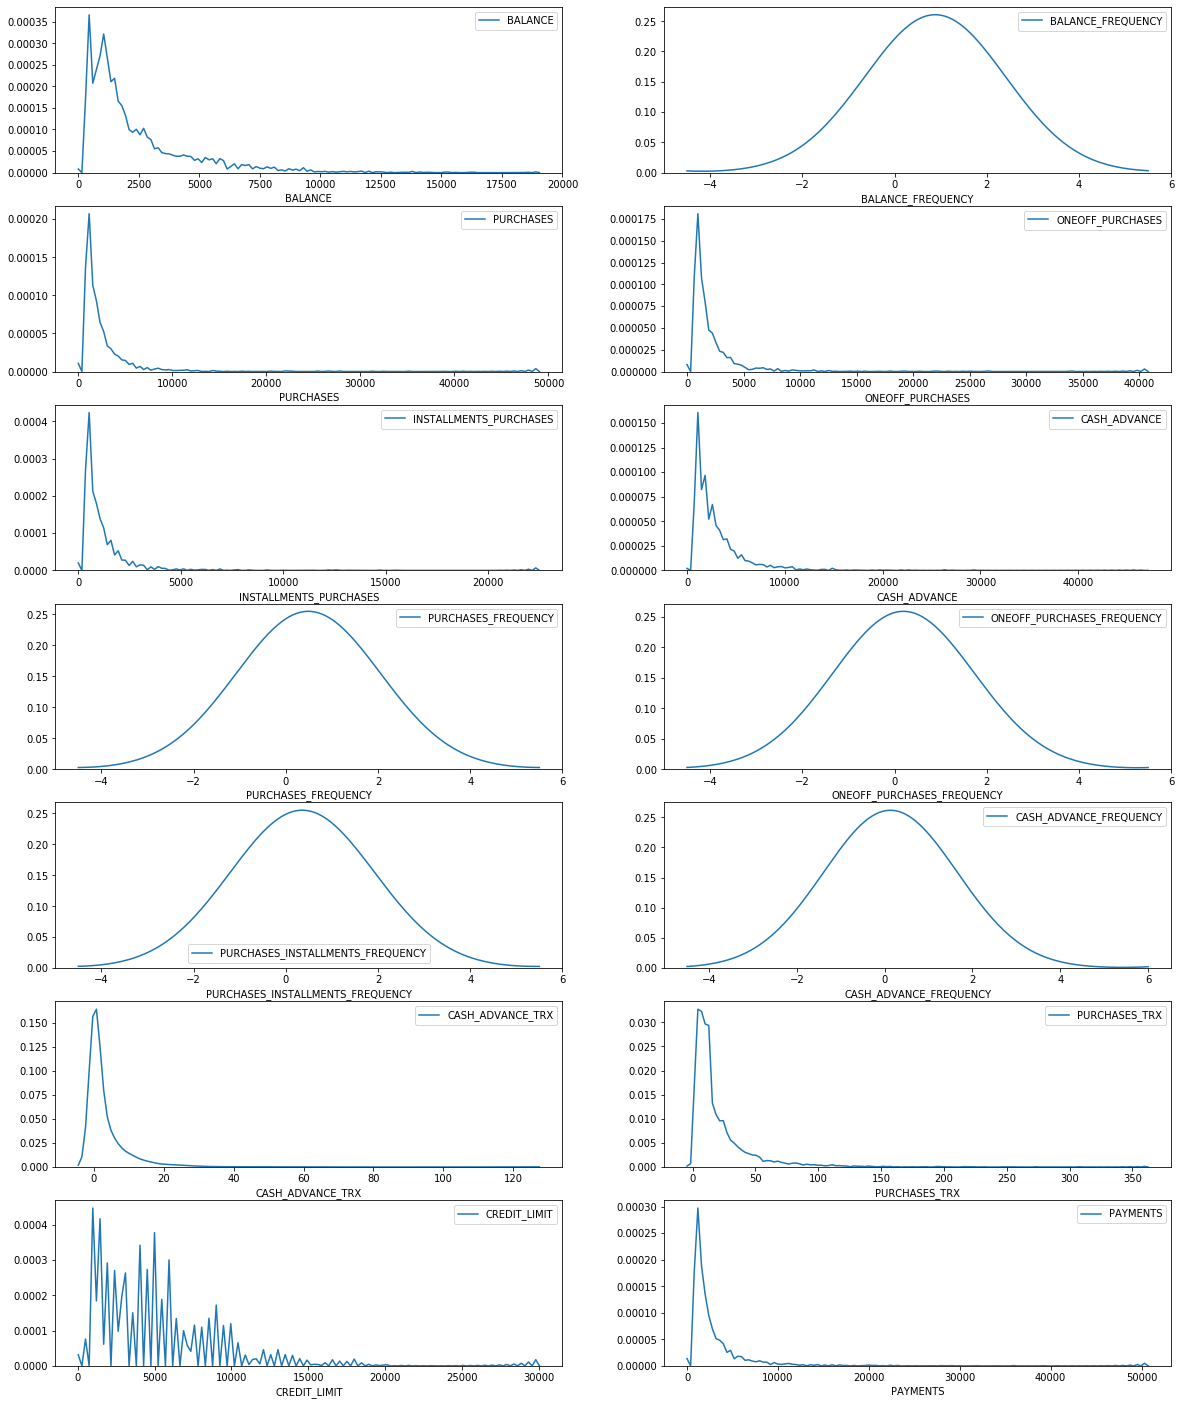

In [345]:
plt.figure(figsize=(20,25))

for column in df:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df[column],bw=1.5)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

#### 4.3 Pairplot
Below the pariplot shows a pairwise relationships in a dataset. 

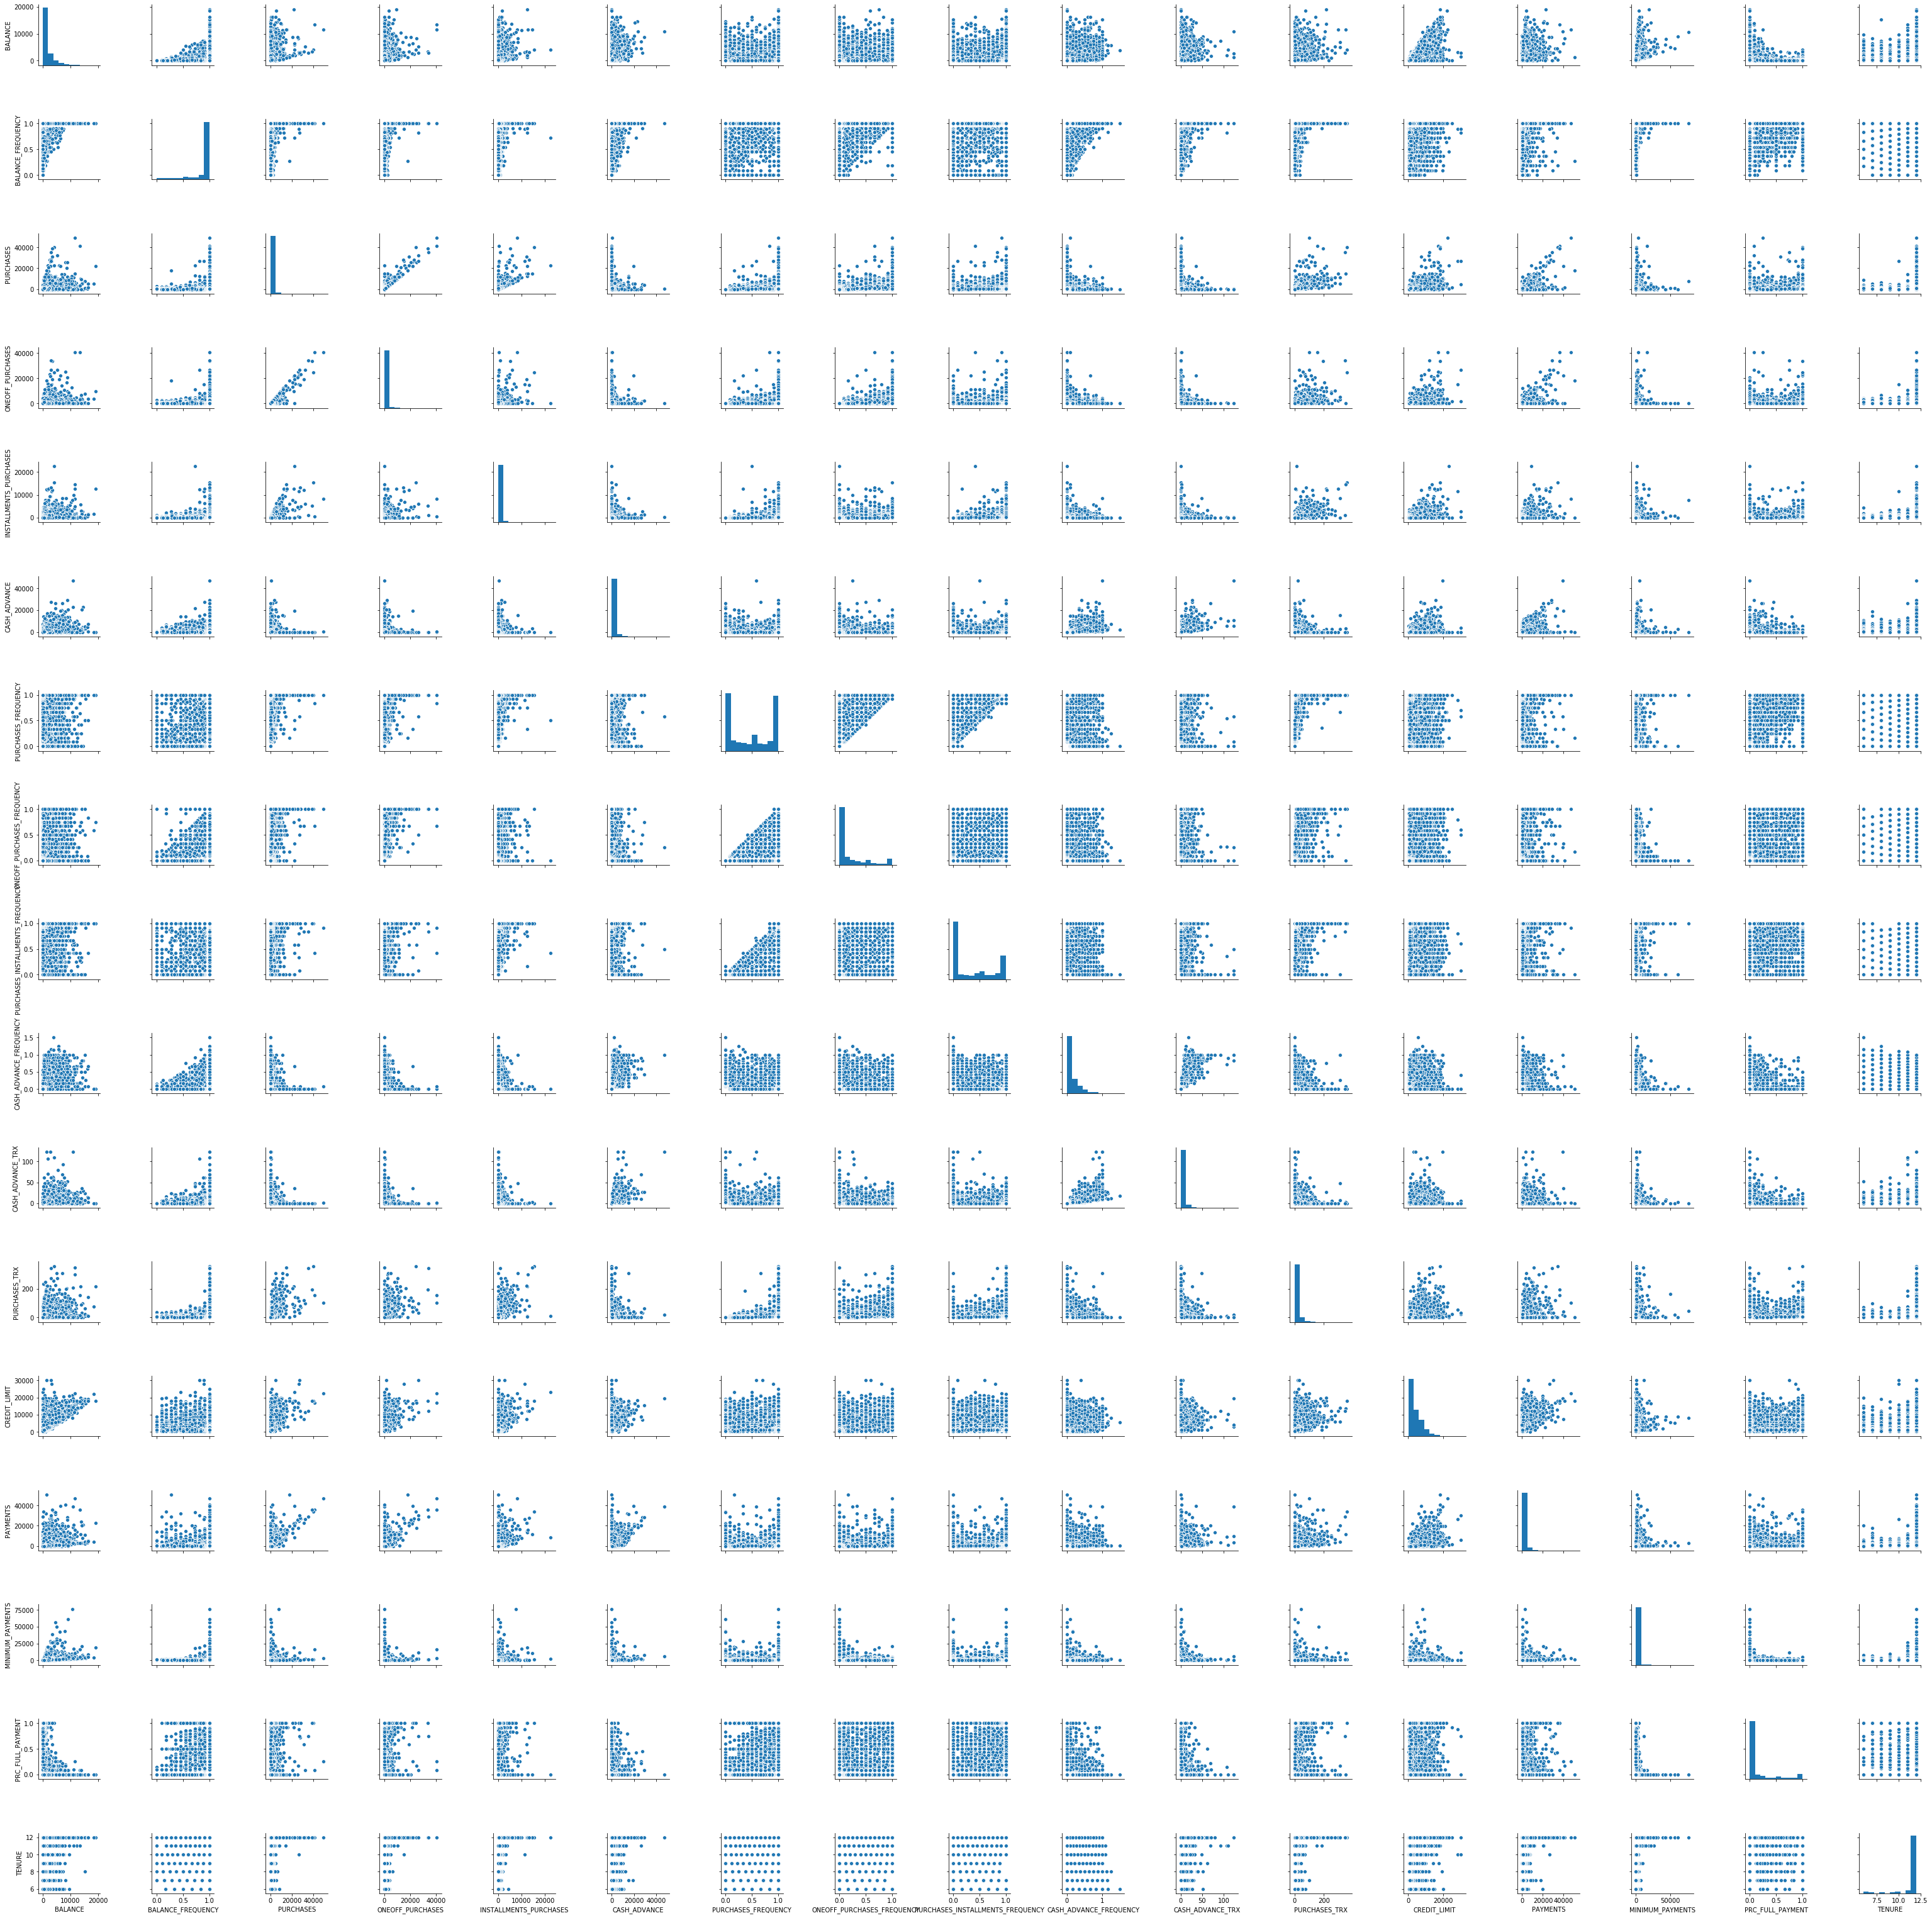

In [83]:
sns.pairplot(data=df)

#### 4.4 Correlation Heatmap
The heatmap is showing correlation between each features. When the number is closer to 1, it means that the correlation is high. It the number is closer to 0, it means that there is less correlation. The correlation between self shows at 1.0 so we do not have to pay attention to self. Our results show that ONEOFF_PURCHASE and PURCHASE has the highest correlation. 

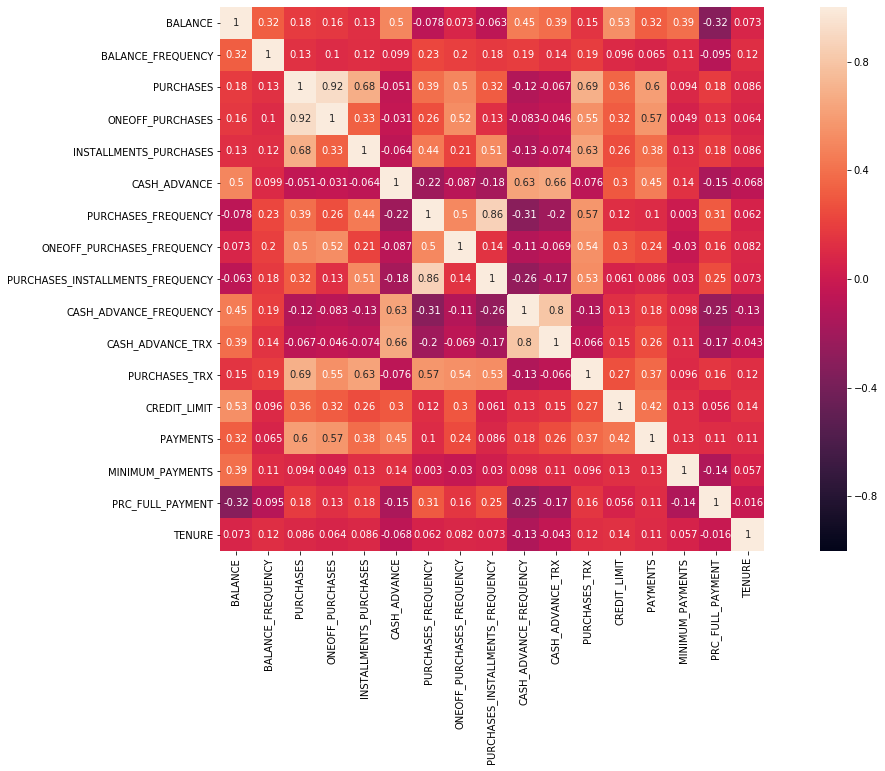

In [81]:
corrmat = df.corr()
fig = plt.figure(figsize = (20, 10))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

### 5. Modeling & Evaluation
#### 5.1 K-means Method 

The K-means clustering algorithm is an unsupervised learning algorithm used to find groups which have not been explicitly labeled in the data. The model can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. After the model is progressed and the groups are clustered, new data can be easily assigned to the correct group.

Reference: https://blogs.oracle.com/datascience/introduction-to-k-means-clustering#:~:text=The%20K%2Dmeans%20clustering%20algorithm%20is%20used%20to%20find%20groups,groups%20in%20complex%20data%20sets.

In [321]:
cost =[]
for i in range(1,30):
    km =KMeans(n_clusters=i)
    km.fit(scaled_df)
    cost.append(km.inertia_)

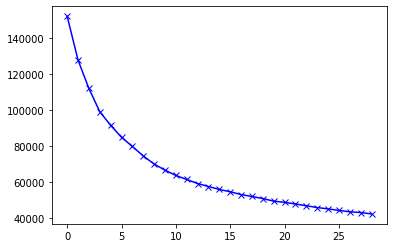

In [322]:
plt.plot(cost,'bx-')

It seems like 4 is where the elbow is so we will go with 4 for clusters. 

In [323]:
#X, y = make_blobs(n_samples = 8950, n_features = 2, centers = 4, cluster_std= .5)

In [381]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(scaled_df)
labels= kmeans.labels_

In [382]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


Below shows the 4 clusters.

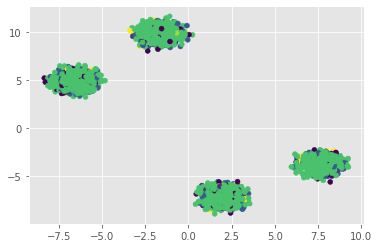

In [379]:
cl_centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c = y_hat, s = 25)

#### 5.2 Principal Component Analysis (PCA)

PCA is also an unsupervised machine learning algorithm. It performs dimensionality reductions while attempting to keep the original information unchanged.

In [370]:
pca = PCA(2) 
X_pca = pca.fit_transform(scaled_df) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2'] 
  
X_pca.head(4)

,P1,P2
0,-1.682221,-1.076453
1,-1.138297,2.506489
2,0.969684,-0.383497
3,-0.873629,0.043144


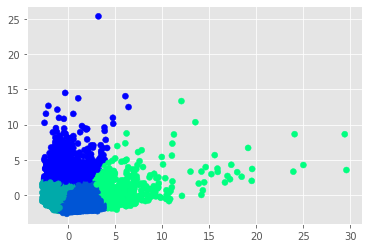

In [371]:
plt.style.use('ggplot')
plt.scatter(X_pca['P1'], X_pca['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_pca), cmap =plt.cm.winter) 
plt.show() 

#### 5.3 Evaluation

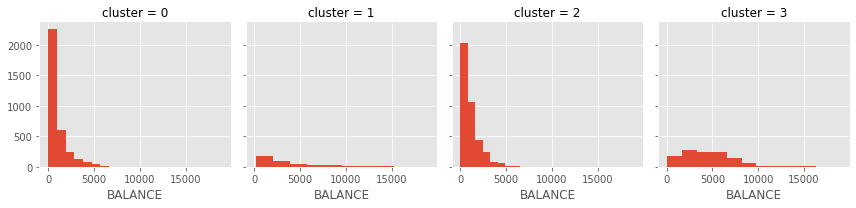

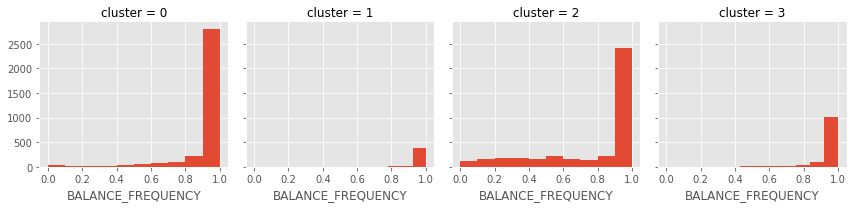

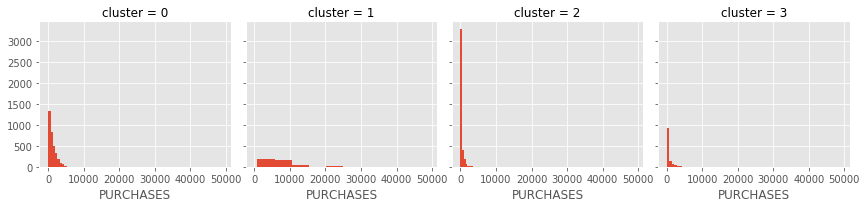

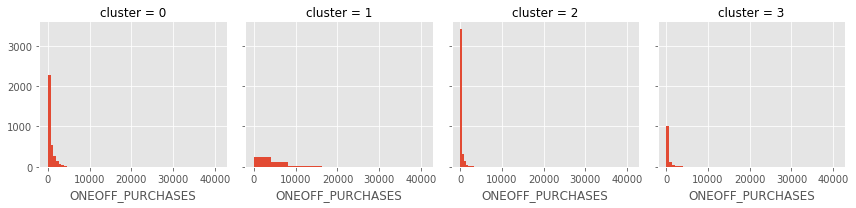

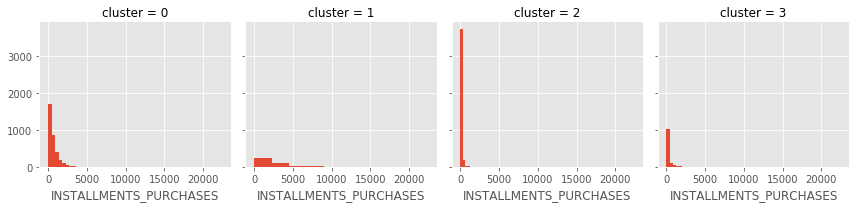

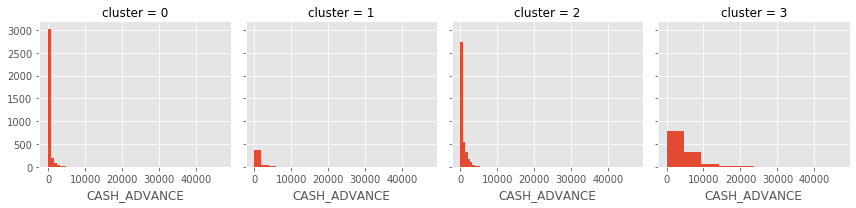

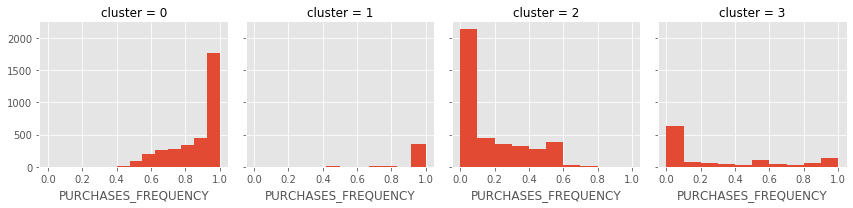

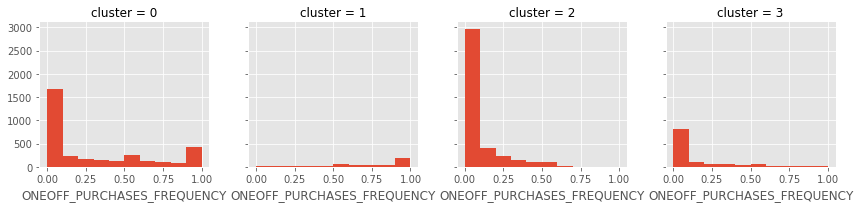

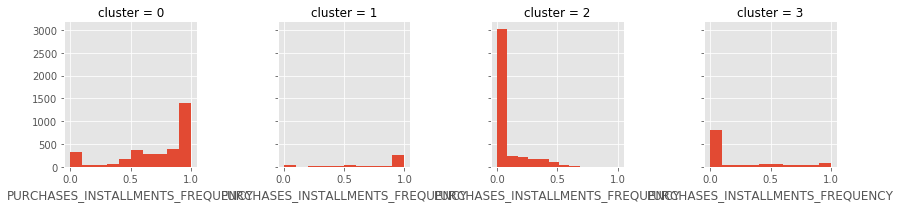

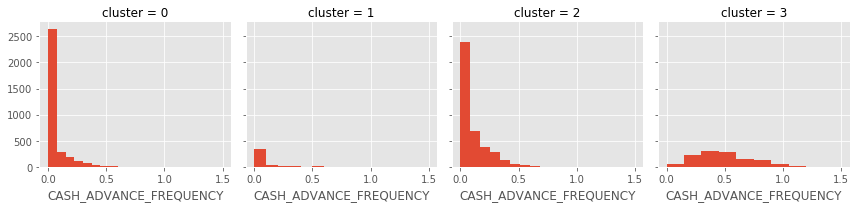

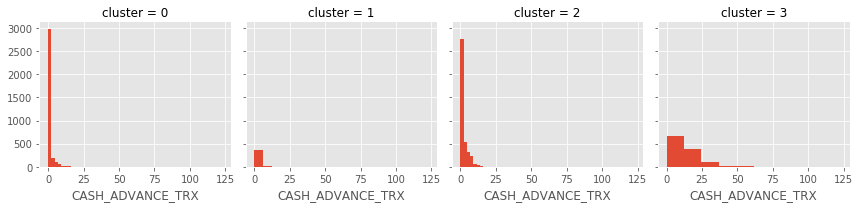

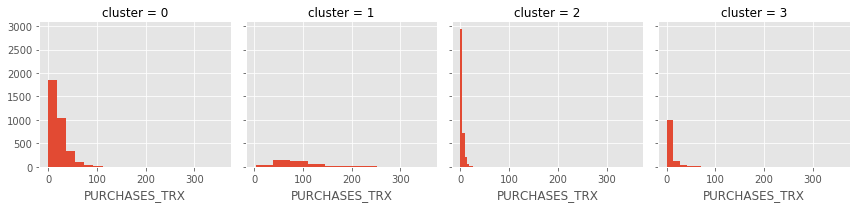

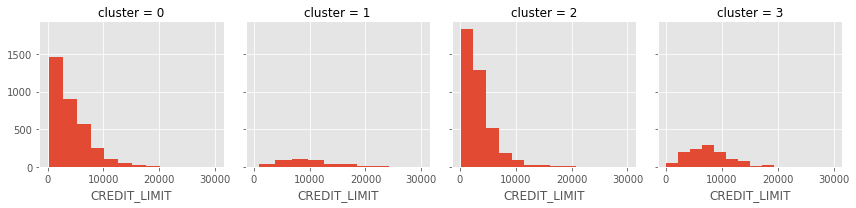

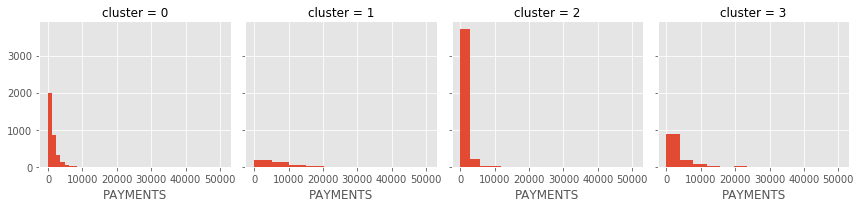

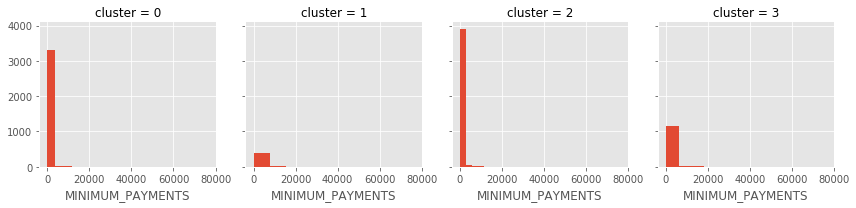

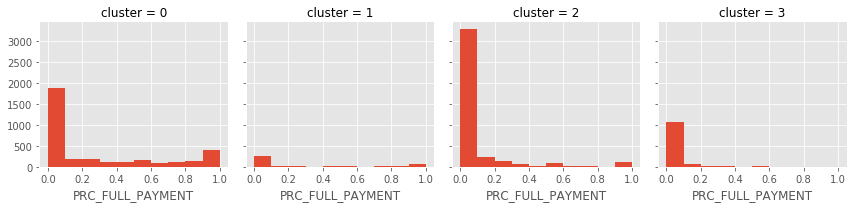

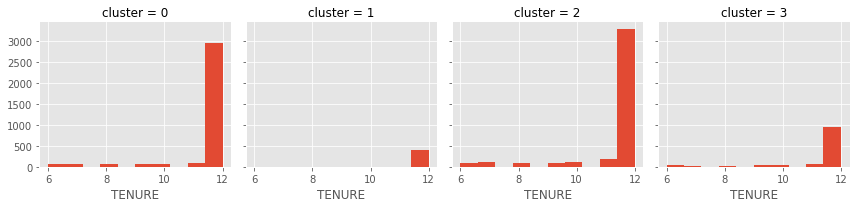

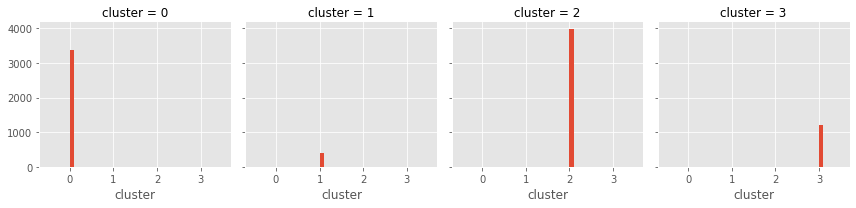

In [383]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [384]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312



Cluster 0 : This group frequently uses their credit card but has a low balance in their account. They do not put much cash in advance, and most purchases are made by card. They have a low limit. 

Cluster 1 : This group frequently uses their credit card to purchase high priced items. They have a high balance and high minimum payment. 

Cluster 2 : This group does not use their credit card so much, nor pay off their card oftenly. 

Cluster 3 : This group has a high balance in their credit card and frequently uses it to buy low priced items. They put cash in advance more than the other groups but do not make full payments often. 

### 7. Conclusion & Looking forward

By using KMeans method and PCA, we were able to cluster the customers into 4 groups. With the results of the algorithms, the 4 clusters' different usage behaviors were categorized. By looking at the different groups, it seems like the customers in cluster 0 could be college students, cluster 1 could be high income adults with more years of working experience, cluster 2 could be people using K bank's card as a secondary card instead of their primary card, and cluster 3 could be younger adults who are single, trying to save up money. In order to help K bank with their new card promotion, I would suggest including benefits that would catch each group's interest. They can include deals such as

1) bonus cash back points if you show your student ID when opening the new card 

2) For the number of times the customer uses and pays off the card, they will receive bonus points. The higher number, higher bonus

3) K bank can affiliate with different companies that require monthly subscription/payment (gas, water, YouTube, etc.) and provide higher points for those monthly payments.

I believe these suggestions would help the bank with their new promotion, but if more information about the customers were provided (such as gender, age, status etc) it would have been easier to come up with more specific and effective solutions.
This project used machine learning algorithms learned only in class. Although the K means and PCA provided clustering solutions, I would like to apply other models to compare the outcomes as I learn more techniques. Also, it would be interesting to investigate ways to cluster by the purchased items instead of card usage.
